In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# (1) Preprocessing: Detect face and eyes

In [2]:
image= cv2.imread('test_image/th_id=OIP (3).jpg')
image.shape

(180, 144, 3)

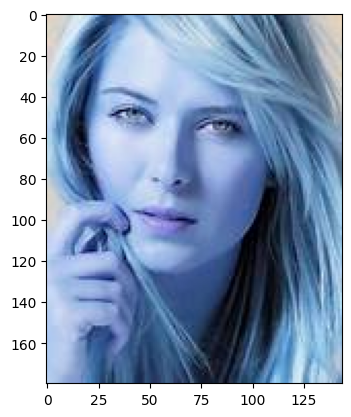

In [3]:
plt.imshow(image)

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

(180, 144)

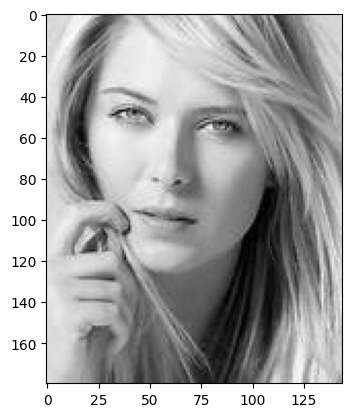

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
gray

array([[214, 214, 215, ..., 206, 207, 209],
       [210, 211, 212, ..., 204, 206, 207],
       [207, 208, 208, ..., 203, 205, 206],
       ...,
       [215, 212, 209, ..., 184, 157, 162],
       [217, 214, 210, ..., 168, 153, 152],
       [218, 215, 211, ..., 156, 151, 145]], dtype=uint8)

In [7]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 11,  11, 105, 105]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(11), np.int32(11), np.int32(105), np.int32(105))

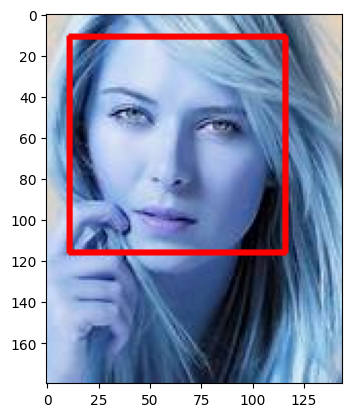

In [9]:
face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

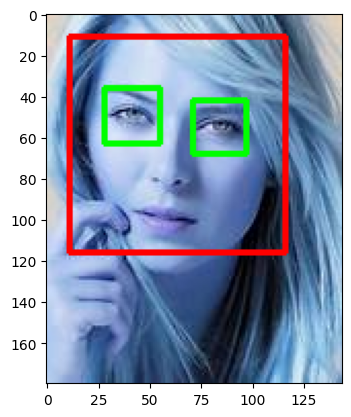

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

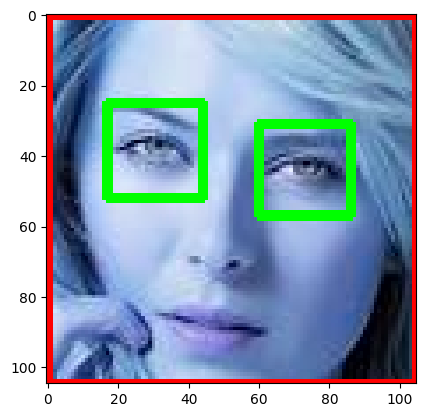

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [63]:
# Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

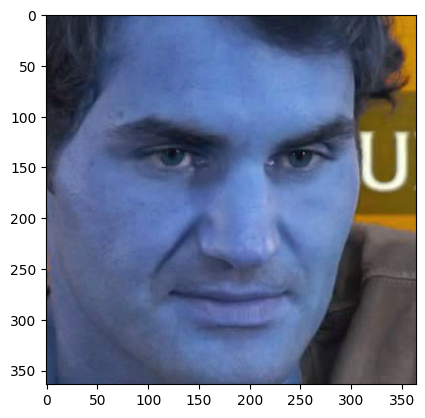

In [13]:
cropped_image = get_cropped_image_if_2_eyes('images_dataset/roger_federer/88m_ilrAGFA.jpg')
plt.imshow(cropped_image)

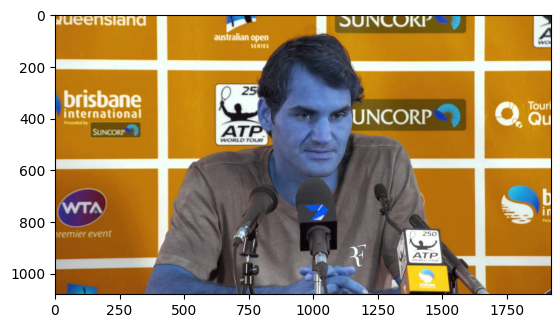

In [14]:
original_image = cv2.imread('images_dataset/roger_federer/88m_ilrAGFA.jpg')
plt.imshow(original_image)

In [20]:
path_to_data = "images_dataset/"
path_to_cr_data = "images_dataset/cropped/"

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['images_dataset/angelina_jolie',
 'images_dataset/lionel_messi',
 'images_dataset/maria_sharapova',
 'images_dataset/roger_federer',
 'images_dataset/serena_williams',
 'images_dataset/virat_kohli']

In [64]:
# Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [24]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir) 
    print(f"\n Processing: {celebrity_name}")
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(('.jpg', '.jpeg', '.png')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print(f"\n Generating cropped images in folder: {cropped_folder}")
                
                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                
                count += 1


 Processing: angelina_jolie

 Generating cropped images in folder: images_dataset/cropped/angelina_jolie

 Processing: lionel_messi

 Generating cropped images in folder: images_dataset/cropped/lionel_messi

 Processing: maria_sharapova

 Generating cropped images in folder: images_dataset/cropped/maria_sharapova

 Processing: roger_federer

 Generating cropped images in folder: images_dataset/cropped/roger_federer

 Processing: serena_williams

 Generating cropped images in folder: images_dataset/cropped/serena_williams

 Processing: virat_kohli

 Generating cropped images in folder: images_dataset/cropped/virat_kohli


# Wavelet Transform

In [25]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

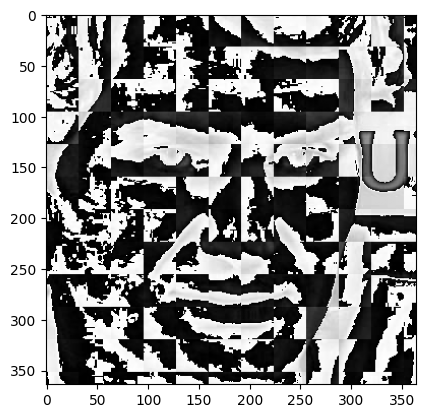

In [27]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [35]:
celebrity_file_names_dict = {}    # We deleted some images manually so again we have to iterate through the folder to get the images
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'angelina_jolie': ['images_dataset/cropped/angelina_jolie\\angelina_jolie1.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie10.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie11.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie12.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie13.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie14.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie15.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie16.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie17.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie18.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie19.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie2.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie20.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie21.png',
  'images_dataset/cropped/angelina_jolie\\angelina_jolie22.png',
  'images

In [36]:
class_dict = {}  # Assigning some class no. to each celebrity
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'angelina_jolie': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [38]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)   # Read image
        scalled_raw_img = cv2.resize(img, (32, 32))  # Scale the image
        img_har = w2d(img,'db1',5)   # Convert the image into Wavelet transformed image
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))  # Stacked both images vertically
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [39]:
len(X[0])

4096

In [40]:
X[0]

array([[175],
       [181],
       [201],
       ...,
       [253],
       [  1],
       [ 63]], dtype=uint8)

In [41]:
y[0]

0

In [42]:
X = np.array(X).reshape(len(X),4096).astype(float)  # Converting it into float so that dut=ring training it doesn't cause error
X.shape

(172, 4096)

# Model Training

In [43]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7674418604651163

In [45]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       1.00      0.67      0.80         9
           2       0.38      0.60      0.46         5
           3       1.00      0.62      0.77         8
           4       1.00      1.00      1.00         6
           5       0.67      1.00      0.80         8

    accuracy                           0.77        43
   macro avg       0.81      0.77      0.77        43
weighted avg       0.84      0.77      0.78        43



In [61]:
# Grid Search

In [46]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [52]:
from xgboost import XGBClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    },
    'xgboost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        'params': {
            'xgbclassifier__n_estimators': [50, 100],
            'xgbclassifier__max_depth': [3, 5],
            'xgbclassifier__learning_rate': [0.01, 0.1]
        }
    }
}

In [53]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linea

,model,best_score,best_params
0,svm,0.814769,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.659692,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.798769,{'logisticregression__C': 1}
3,xgboost,0.675385,"{'xgbclassifier__learning_rate': 0.1, 'xgbclas..."


In [54]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))]),
 'xgboost': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('xgbclassifier',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, device=None,
                                early_stopping_rounds=None,
                           

In [55]:
best_estimators['svm'].score(X_test,y_test)

0.813953488372093

In [56]:
best_estimators['random_forest'].score(X_test,y_test)

0.627906976744186

In [57]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8604651162790697

In [58]:
best_estimators['xgboost'].score(X_test,y_test)

0.7674418604651163

In [62]:
# Hyperparameter Tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])
xgb_param_dist = {
    'xgb__n_estimators': [50, 100, 200, 300],
    'xgb__max_depth': [3, 4, 5, 6, 7],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__gamma': [0, 0.1, 0.2, 0.5]
}

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])
logreg_param_dist = {
    'logreg__penalty': ['l1', 'l2', 'elasticnet', None], 
    'logreg__C': np.logspace(-4, 4, 10),
    'logreg__solver': ['saga'],
    'logreg__l1_ratio': np.linspace(0, 1, 5)  
}

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])
svm_param_dist = {
    'svm__C': np.logspace(-3, 3, 10),
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svm__gamma': ['scale', 'auto'] + list(np.logspace(-4, 1, 5))
}

def hypertune_and_evaluate(pipeline, param_dist, X_train, y_train, X_test, y_test, model_name):
    print(f"\n--- RandomizedSearchCV for {model_name} ---")
    clf = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=50,
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1,
        random_state=42,
        error_score='raise' 
    )

    try:
        clf.fit(X_train, y_train)
    except Exception as e:
        print(f"Error in fitting {model_name}:", e)
        return None

    print(f"Best CV Accuracy for {model_name}: {clf.best_score_}")
    print(f"Best Params for {model_name}: {clf.best_params_}")

    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"Test Accuracy for {model_name}: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return best_model

best_estimators = {}
best_estimators['XGBoost'] = hypertune_and_evaluate(xgb_pipeline, xgb_param_dist, X_train, y_train, X_test, y_test, "XGBoost")
best_estimators['LogisticRegression'] = hypertune_and_evaluate(logreg_pipeline, logreg_param_dist, X_train, y_train, X_test, y_test, "Logistic Regression")
best_estimators['SVM'] = hypertune_and_evaluate(svm_pipeline, svm_param_dist, X_train, y_train, X_test, y_test, "SVM")


--- RandomizedSearchCV for XGBoost ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:38:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best CV Accuracy for XGBoost: 0.7658730158730159
Best Params for XGBoost: {'xgb__subsample': 0.6, 'xgb__n_estimators': 200, 'xgb__max_depth': 4, 'xgb__learning_rate': 0.01, 'xgb__gamma': 0.2, 'xgb__colsample_bytree': 0.6}
Test Accuracy for XGBoost: 0.7714285714285715
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.60      1.00      0.75         6
           2       0.60      0.60      0.60         5
           3       0.67      1.00      0.80         2
           4       1.00      0.60      0.75         5
           5       1.00      0.90      0.95        10

    accuracy                           0.77        35
   macro avg       0.78      0.78      0.75        35
weighted avg       0.82      0.77      0.77        35

Confusion Matrix:
 [[4 2 1 0 0 0]
 [0 6 0 0 0 0]
 [1 1 3 0 0 0]
 [0 0 0 2 0 0]
 [0 1 0 1 3 0]
 [0 0 1 0 0 9]]

--- RandomizedSearchCV for Logistic Regression ---
Fit

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Best CV Accuracy for Logistic Regression: 0.8240740740740741
Best Params for Logistic Regression: {'logreg__solver': 'saga', 'logreg__penalty': 'l2', 'logreg__l1_ratio': np.float64(0.5), 'logreg__C': np.float64(0.046415888336127774)}
Test Accuracy for Logistic Regression: 0.8857142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       1.00      0.83      0.91         6
           2       0.83      1.00      0.91         5
           3       0.67      1.00      0.80         2
           4       1.00      0.80      0.89         5
           5       1.00      0.90      0.95        10

    accuracy                           0.89        35
   macro avg       0.88      0.90      0.88        35
weighted avg       0.91      0.89      0.89        35

Confusion Matrix:
 [[6 0 0 1 0 0]
 [1 5 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 2 0 0]
 [1 0 0 0 4 0]
 [0 0 1 0 0 9]]

--- RandomizedSearchCV for SVM

In [69]:
best_estimators

{'XGBoost': Pipeline(steps=[('scaler', StandardScaler()),
                 ('xgb',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=0.6, device=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric='mlogloss',
                                feature_types=None, feature_weights=None,
                                gamma=0.2, grow_policy=None,
                                importance_type=None,
                                interaction_constraints=None, learning_rate=0.01,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=4, max_leaves=None,
                                min_child_weight=None, missing=nan,
  

In [71]:
best_estimators['LogisticRegression'].score(X_test,y_test)

0.8857142857142857

In [72]:
best_estimators['SVM'].score(X_test,y_test)

0.8285714285714286

In [73]:
best_estimators['XGBoost'].score(X_test,y_test)

0.7714285714285715

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier, StackingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, gamma=0.1, random_state=42)
svm = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42)
logreg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000, random_state=42)

#Build Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('svm', svm),
    ('logreg', logreg)
], voting='soft', n_jobs=-1)

# SMOTE + Scaling + Voting Pipeline
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('voting', voting_clf)
])

# Train Voting Pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Stacking Classifier with Logistic Regression as final estimator ---
stacking_clf = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('svm', svm),
        ('logreg', logreg)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    n_jobs=-1,
    passthrough=True
)

stacking_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('stacking', stacking_clf)
])

stacking_pipeline.fit(X_train, y_train)
y_pred_stack = stacking_pipeline.predict(X_test)
print("\nStacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))

Voting Classifier Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.50      0.67         6
           2       0.86      1.00      0.92         6
           3       1.00      0.50      0.67         4
           4       0.60      0.60      0.60         5
           5       0.89      1.00      0.94         8

    accuracy                           0.80        35
   macro avg       0.84      0.77      0.77        35
weighted avg       0.84      0.80      0.79        35

Confusion Matrix:
 [[6 0 0 0 0 0]
 [1 3 0 0 1 1]
 [0 0 6 0 0 0]
 [1 0 0 2 1 0]
 [1 0 1 0 3 0]
 [0 0 0 0 0 8]]

Stacking Classifier Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.50      0.67         6
           2       0.86      1.00      0.92         6
           3   

In [76]:
best_clf = best_estimators['LogisticRegression']

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[6, 0, 0, 0, 0, 0],
       [1, 5, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [1, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 8]])

Text(95.72222222222221, 0.5, 'Truth')

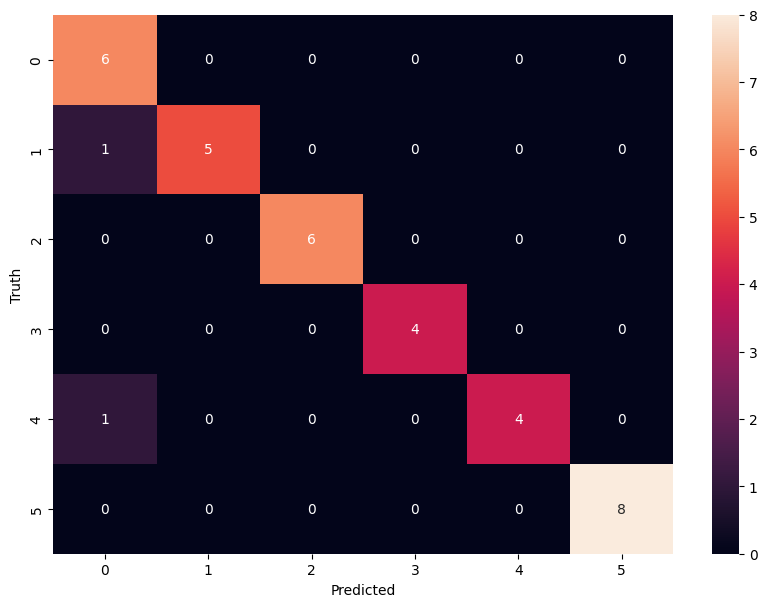

In [78]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Save train Model

In [79]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

# Save class dictionary

In [80]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))